<a href="https://colab.research.google.com/github/rajeshmore1/DataScience_Mentorship/blob/main/ML_19_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors

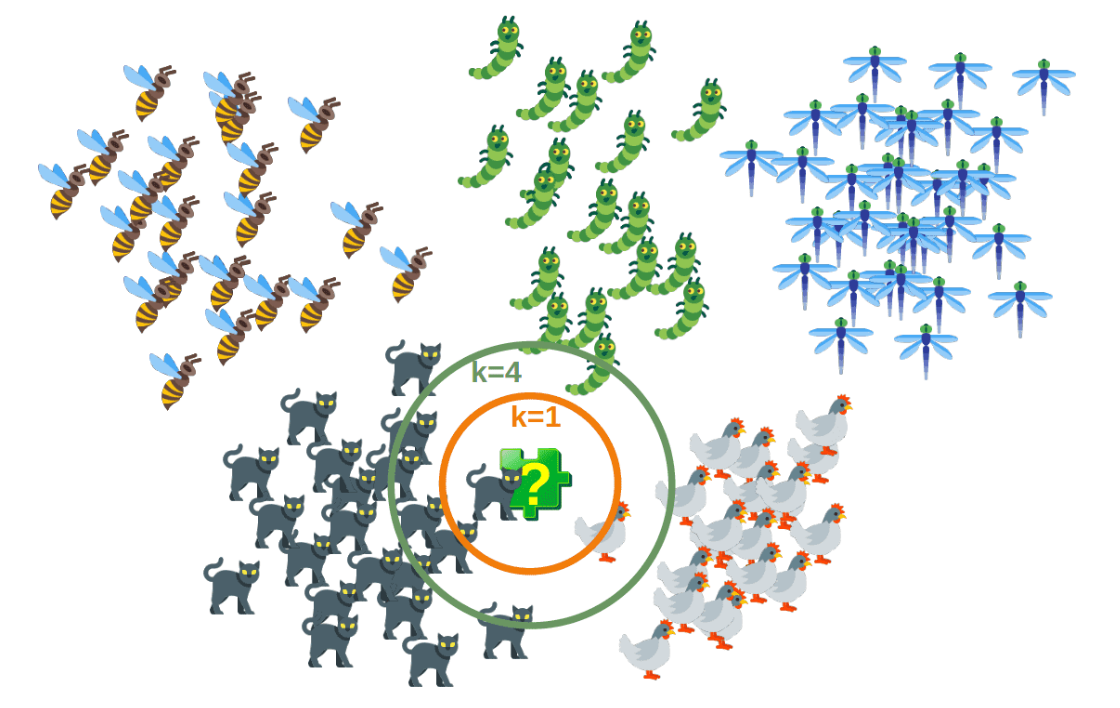

# Introduction

K-nearest neighbors (KNN) is a type of supervised learning algorithm used for both regression and classification. KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closet to the test data. The KNN algorithm calculates the probability of the test data belonging to the classes of ‘K’ training data and class holds the highest probability will be selected. In the case of regression, the value is the mean of the ‘K’ selected training points.

Let see the below example to make it a better understanding

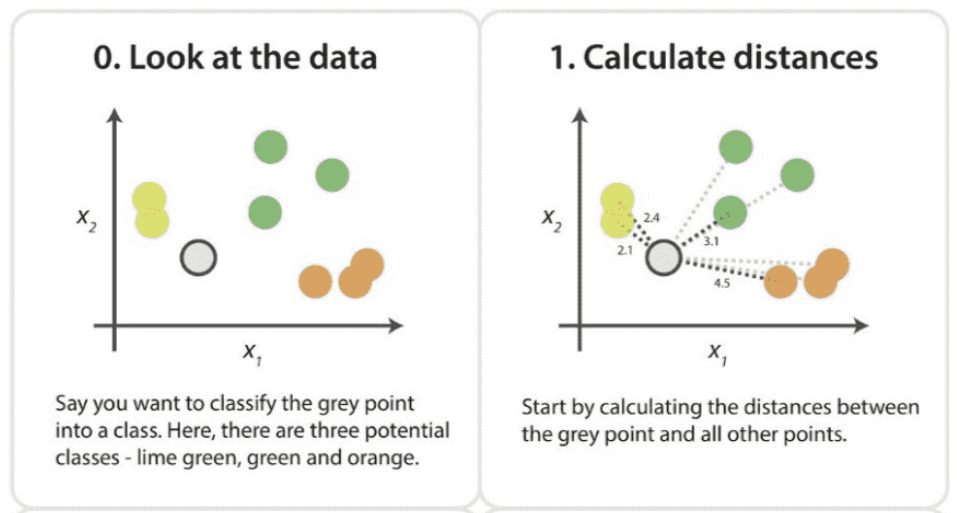

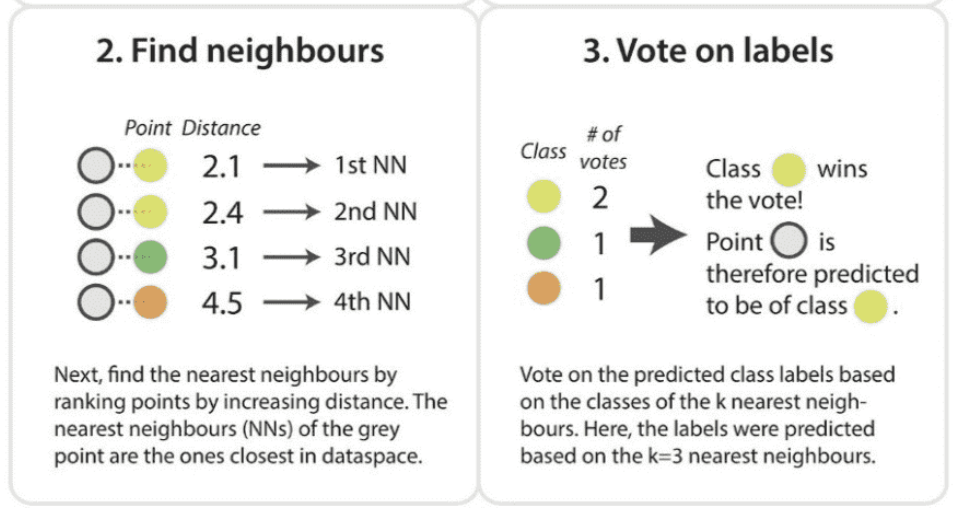

Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.

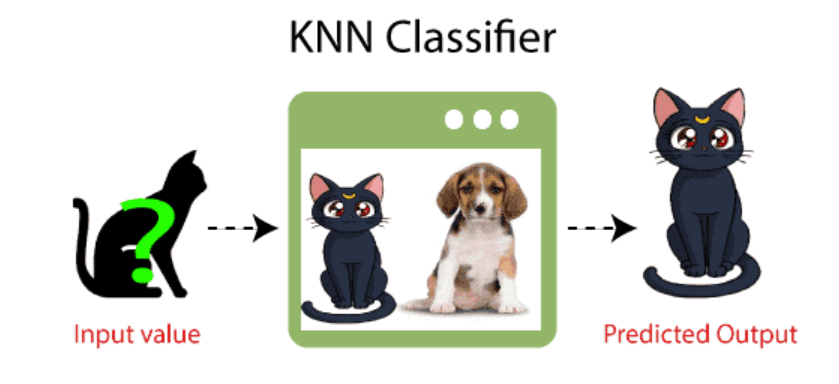

# Why do we need a K-NN Algorithm?

Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset. Consider the below diagram:

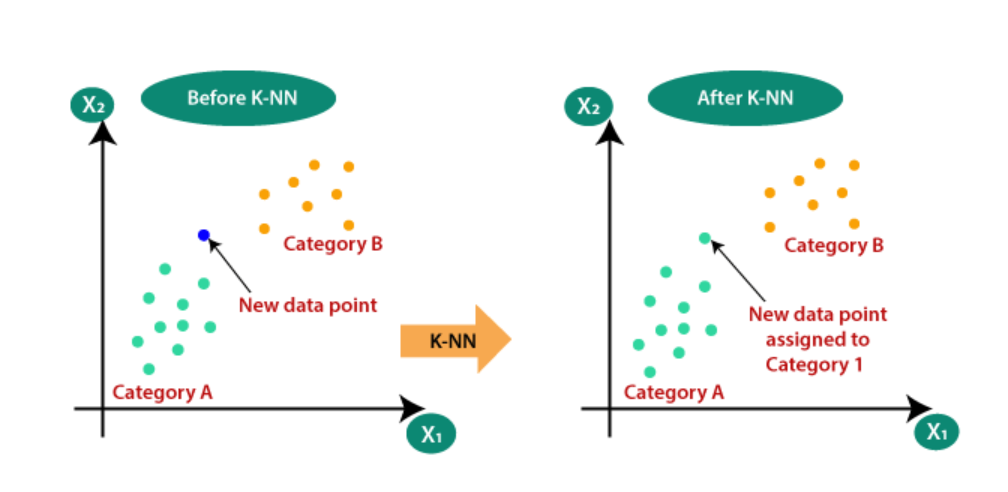

How does K-NN work?

The K-NN working can be explained on the basis of the below algorithm:

* Step-1: Select the number K of the neighbors
* Step-2: Calculate the Euclidean distance of K number of neighbors
* Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
* Step-4: Among these k neighbors, count the number of the data points in each category.
* Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
* Step-6: Our model is ready.

Suppose we have a new data point and we need to put it in the required category. Consider the below image:

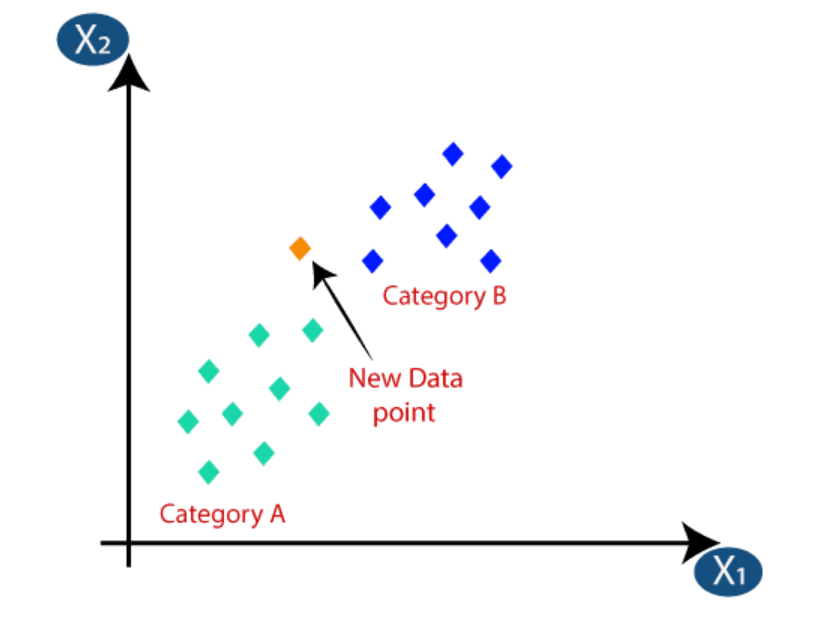

* Firstly, we will choose the number of neighbors, so we will choose the k=5.
* Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as:

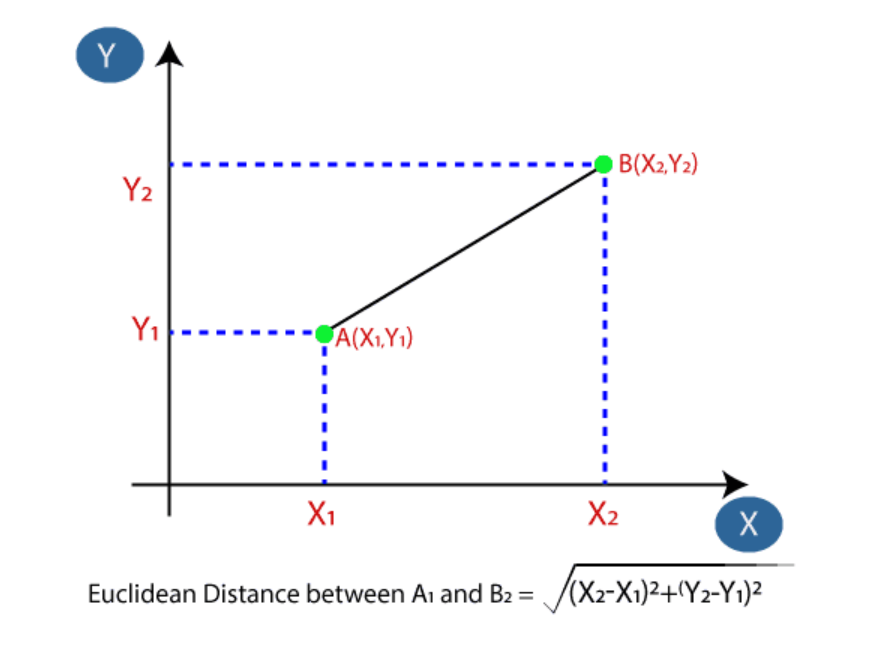

By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B. Consider the below image:

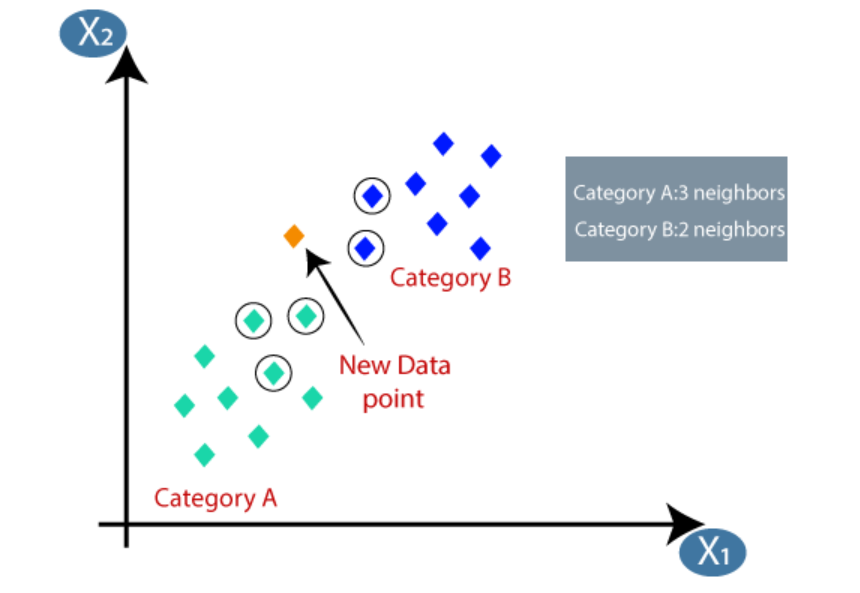

* As we can see the 3 nearest neighbors are from category A, hence this new data point must belong to category A.
# How to choose a K value?

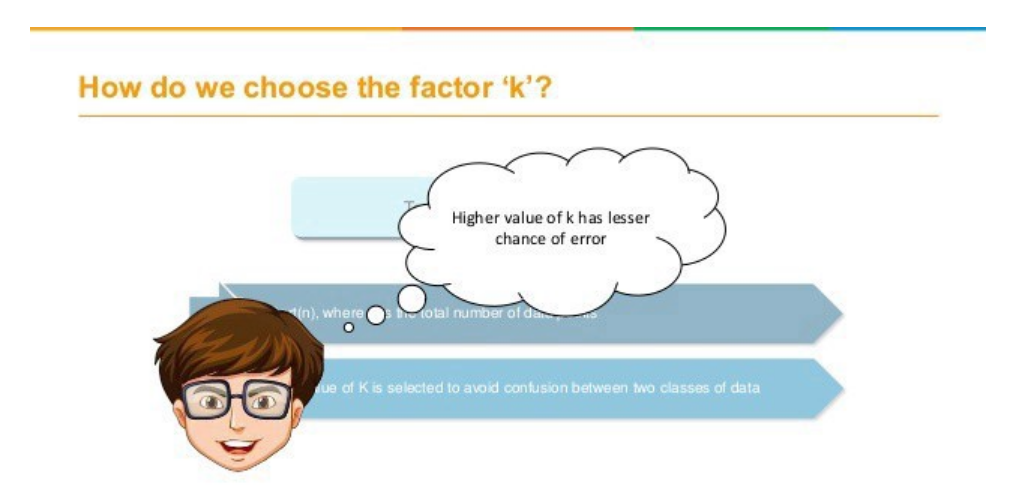

Kvalue indicates the count of the nearest neighbors. We have to compute distances between test points and trained labels points. Updating distance metrics with every iteration is computationally expensive, and that’s why **KNN is a lazy learning algorithm.**

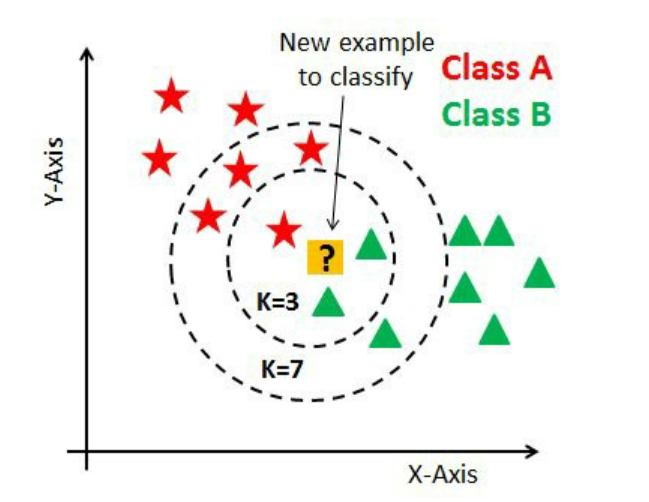

* As you can verify from the above image, if we proceed with K=3, then we predict that test input belongs to class B, and if we continue with K=7, then we predict that test input belongs to class A.
* That’s how you can imagine that the K value has a powerful effect on KNN performance.

# Then how to select the optimal K value?

* There are no pre-defined statistical methods to find the most favorable value of K.
* Initialize a random K value and start computing.
* Choosing a small value of K leads to unstable decision boundaries.
* The substantial K value is better for classification as it leads to smoothening the decision boundaries.
* Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.

Now you will get the idea of choosing the optimal K value by implementing the model.

# Calculating distance:

The first step is to calculate the distance between the new point and each training point. There are various methods for calculating this distance, of which the most commonly known methods are — Euclidian, Manhattan (for continuous) and Hamming distance (for categorical).

### Euclidean Distance: 
Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (y).

### Manhattan Distance: 
This is the distance between real vectors using the sum of their absolute difference.

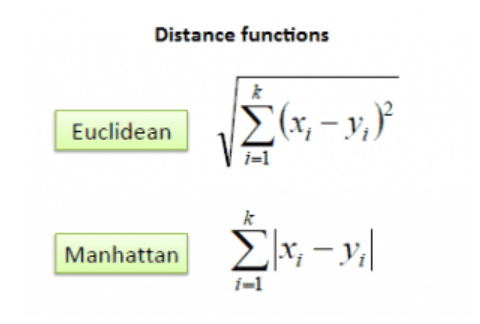

### Hamming Distance: 

It is used for categorical variables. If the value (x) and the value (y) are the same, the distance D will be equal to 0 . Otherwise D=1.

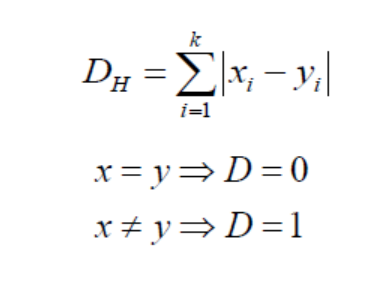

# Ways to perform K-NN

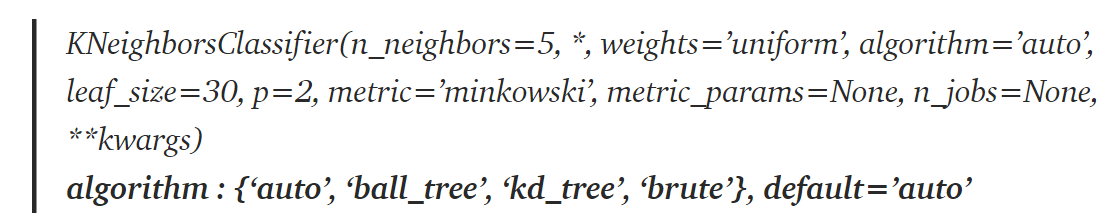

# Brute Force

Lets consider for simple case with two dimension plot. If we look mathematically, the simple intuition is to calculate the euclidean distance from point of interest ( of whose class we need to determine) to all the points in training set. Then we take class with majority points. This is called brute force method.

# k-Dimensional Tree (kd tree)
k-d tree is a hierarchical binary tree. When this algorithm is used for k-NN classficaition, it rearranges the whole dataset in a binary tree structure, so that when test data is provided, it would give out the result by traversing through the tree, which takes less time than brute search.

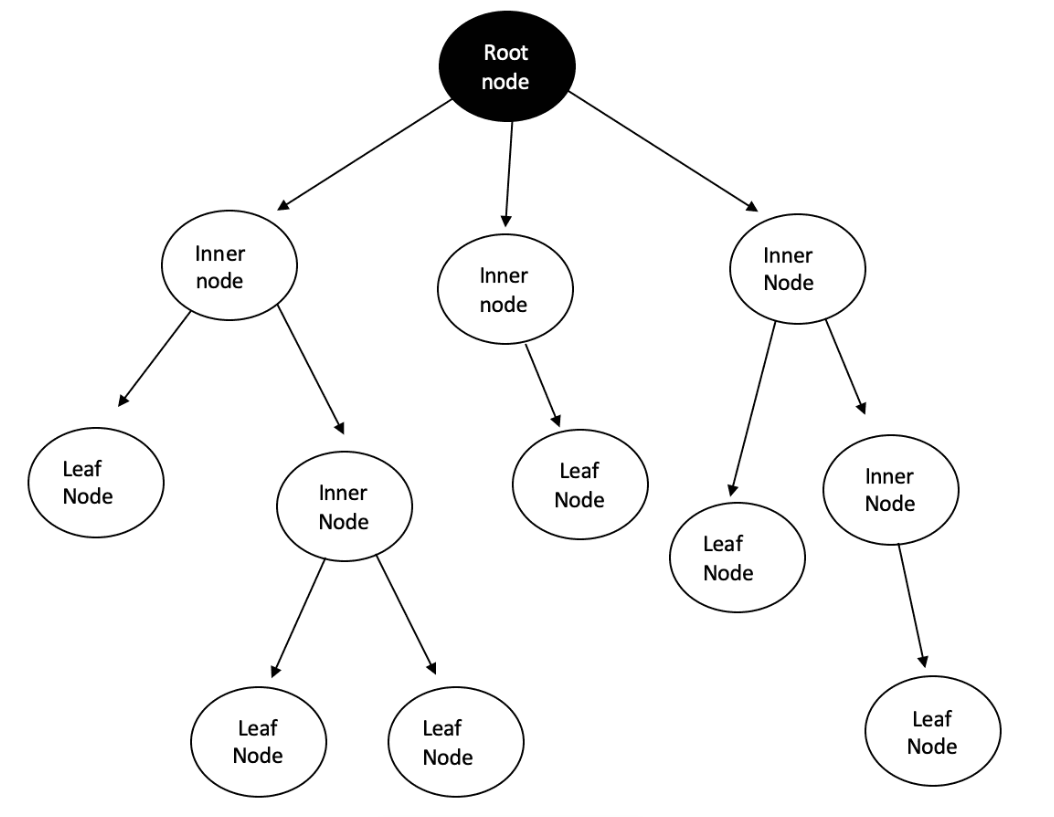

# Ball Tree
Similar to k-d trees, Ball trees are also hierarchical data structure. These are very efficient specially in case of higher dimensions.

* Two clusters are created initially
* All the data points must belong to atleast one of the clusters.
* One point cannot be in both clusters.
* Distance of the point is calculated from the centroid of the each cluster. The point closer to the centroid goes into that particular cluster.
* Each cluster is then divided into sub clusters again, and then the points are classified into each cluster on the basis of distance from centroid.
* This is how the clusters are kept to be divided till a certain depth.

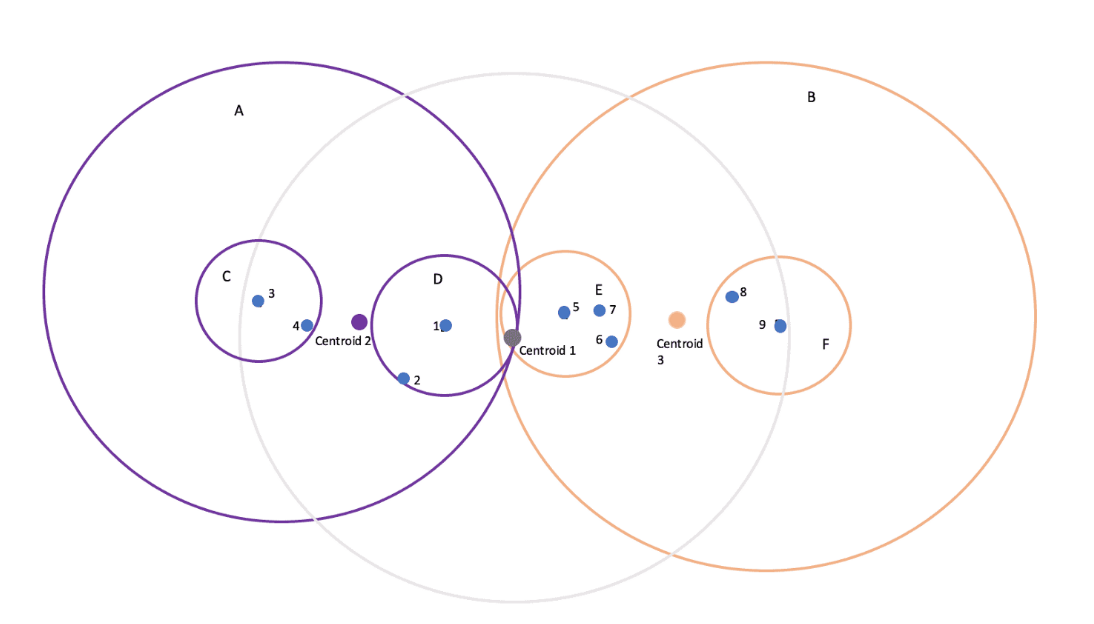

The final resulting Ball Tree as follows,



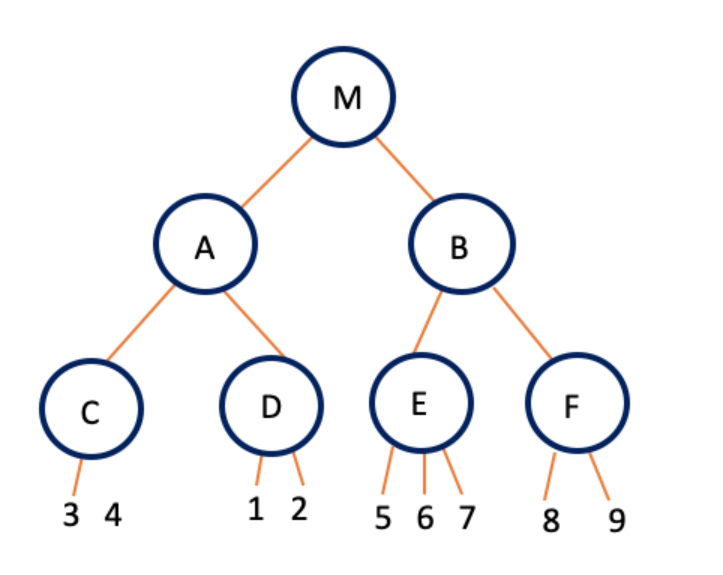

# Comparison and Summary

Brute Force may be the most accurate method due to the consideration of all data points. Hence, no data point is assigned to a false cluster. For small data sets, Brute Force is justifiable, however, for increasing data the KD or Ball Tree is better alternatives due to their speed and efficiency.

# KNN model implementation

Let’s start the application by importing all the required packages. Then read the telecommunication data file using read_csv() function.

Data : https://www.kaggle.com/code/sercanyesiloz/k-nearest-neighbor-knn/data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os


In [7]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/column_2C_weka.csv")

In [8]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


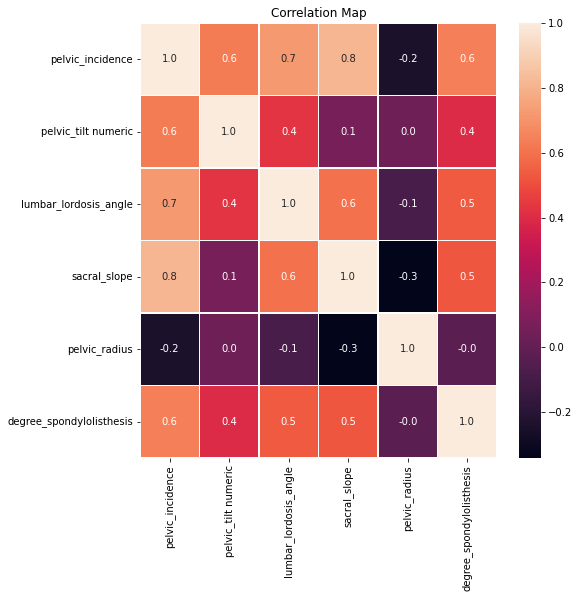

In [9]:
f,ax=plt.subplots(figsize = (8,8))
# corr() is actually pearson correlation
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()


In [10]:
A = data[data["class"] == "Abnormal"]
N = data[data["class"] == "Normal"]

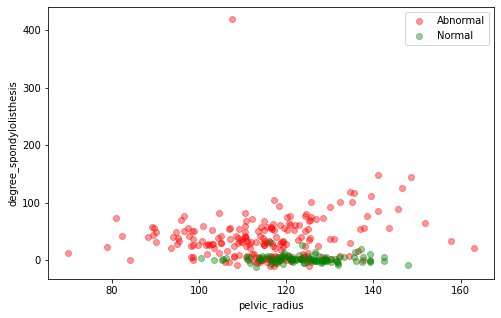

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(A.pelvic_radius,A.degree_spondylolisthesis,label= "Abnormal", color="red", alpha=0.4 )
plt.scatter(N.pelvic_radius,N.degree_spondylolisthesis, label = "Normal", color="green", alpha=0.4)
plt.xlabel("pelvic_radius")
plt.ylabel("degree_spondylolisthesis")
plt.legend()
plt.show()


In [12]:
# string to integer
# Abnormal to 0
# Normal to 1
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
y = data["class"].values

In [13]:
x_data = data.drop(["class"], axis= 1)
x_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


## Normalisation

In [14]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))


In [15]:
# Train Test Split from Sklearn
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# KNN Model¶


In [16]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.7526881720430108 


# Finding Best K Value¶


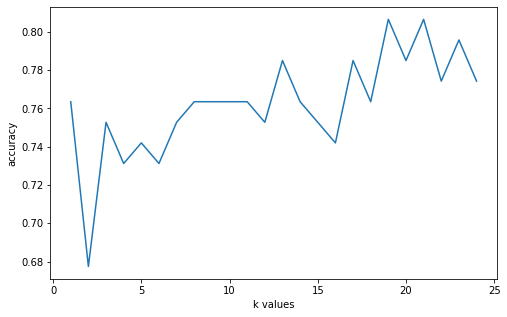

In [17]:
score_list = []
for each in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
plt.figure(figsize=(8,5))    
plt.plot(range(1,25),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(19,knn.score(x_test,y_test)))

 19 nn score: 0.8064516129032258 
 19 nn score: 0.8064516129032258 
